In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import torch

In [2]:
def get_onehots(self, entry, unique_classes):
        """Retrieve one_hot encodings"""
        x = [unique_classes.index(c) for c in entry]
        one_hots = F.one_hot(torch.tensor(x), num_classes=len(unique_classes)).sum(dim=0).tolist()
        return one_hots

In [3]:
df = pd.read_json("./final_data/L1_all_data.json", orient="records")

In [4]:
df.head()

,zone_id,maps_based_class,split,shape_area,species_key,species_count,species_based_class,species_based_num_classes,set_based_class,set_based_num_classes
0,9,4,train,665918.930058,"[3032837, 3170807, 3105433, 2883073]",4,"[0, 0, 1, 1, 1, 1, 0, 0, 0]",4,"[0, 0, 0, 1, 0, 0, 0, 0, 0]",1
1,10,4,train,2991.243434,[4299368],1,"[0, 0, 1, 1, 1, 1, 1, 1, 1]",7,"[0, 0, 1, 1, 0, 0, 0, 1, 1]",4
2,21839,8,train,354037.007286,[4299368],1,"[0, 0, 1, 1, 1, 1, 1, 1, 1]",7,"[0, 0, 1, 1, 0, 0, 0, 1, 1]",4
3,28584,3,train,8464.315756,[4299368],1,"[0, 0, 1, 1, 1, 1, 1, 1, 1]",7,"[0, 0, 1, 1, 0, 0, 0, 1, 1]",4
4,36517,4,train,45404.185118,[4299368],1,"[0, 0, 1, 1, 1, 1, 1, 1, 1]",7,"[0, 0, 1, 1, 0, 0, 0, 1, 1]",4


In [6]:
## List to string for grouping
df["species_key"] = df["species_key"].apply(lambda x : json.dumps(x))

In [7]:
temp = pd.DataFrame(df.groupby("species_key")["maps_based_class"].unique()).reset_index()
temp["set_based_num_classes"] = temp["maps_based_class"].apply(lambda x : len(x))
temp["num_species"] = temp["species_key"].apply(lambda x : len(json.loads(x)))
temp["set_based_class"] = temp["maps_based_class"].apply(lambda x : torch.nn.functional.one_hot(torch.tensor(x)-1,num_classes=9).sum(dim=0).tolist())
temp.set_based_num_classes.value_counts()

1    15791
2      377
3      170
4      117
5       87
6       60
7       31
8       22
9        9
Name: set_based_num_classes, dtype: int64

In [9]:
temp.head()

,species_key,maps_based_class,set_based_num_classes,num_species,set_based_class
0,"[10160919, 5415065, 7270427, 2812375]",[4],1,4,"[0, 0, 0, 1, 0, 0, 0, 0, 0]"
1,[10196288],[3],1,1,"[0, 0, 1, 0, 0, 0, 0, 0, 0]"
2,"[1035185, 8270406, 4472913, 1919712, 7809779, ...",[4],1,10,"[0, 0, 0, 1, 0, 0, 0, 0, 0]"
3,"[1035185, 9013850, 1037319, 6097886, 1035931, ...",[6],1,10,"[0, 0, 0, 0, 0, 1, 0, 0, 0]"
4,"[1035194, 1800032, 7972792, 1792418, 4532532, ...",[7],1,10,"[0, 0, 0, 0, 0, 0, 1, 0, 0]"


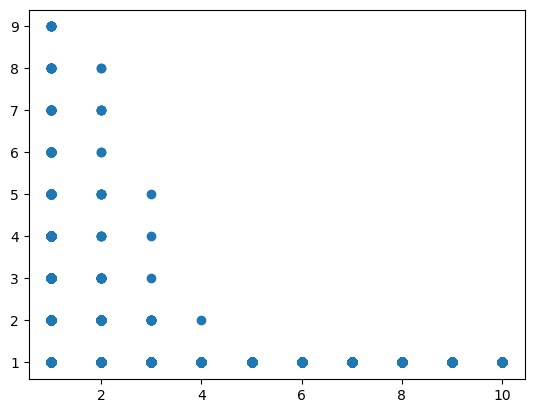

In [80]:
plt.scatter(x=temp.num_species,y=temp.set_based_num_classes)

In [82]:
df = df.rename(columns={"num_classes":"species_based_num_classes"})
df = df.join(temp.set_index("species_key")[["set_based_class","set_based_num_classes"]], on="species_key", how="inner")
df

,zone_id,maps_based_class,split,shape_area,species_key,species_count,species_based_class,species_based_num_classes,set_based_class,set_based_num_classes
0,9,4,train,665918.930058,"[3032837, 3170807, 3105433, 2883073]",4,"[0, 0, 1, 1, 1, 1, 0, 0, 0]",4,"[0, 0, 0, 1, 0, 0, 0, 0, 0]",1
1,10,4,train,2991.243434,[4299368],1,"[0, 0, 1, 1, 1, 1, 1, 1, 1]",7,"[0, 0, 1, 1, 0, 0, 0, 1, 1]",4
5315,21839,8,train,354037.007286,[4299368],1,"[0, 0, 1, 1, 1, 1, 1, 1, 1]",7,"[0, 0, 1, 1, 0, 0, 0, 1, 1]",4
8437,28584,3,train,8464.315756,[4299368],1,"[0, 0, 1, 1, 1, 1, 1, 1, 1]",7,"[0, 0, 1, 1, 0, 0, 0, 1, 1]",4
10428,36517,4,train,45404.185118,[4299368],1,"[0, 0, 1, 1, 1, 1, 1, 1, 1]",7,"[0, 0, 1, 1, 0, 0, 0, 1, 1]",4
...,...,...,...,...,...,...,...,...,...,...
25951,98084,4,test,97910.824985,"[8207244, 3928139, 2787993, 7270427, 3032585, ...",6,"[0, 0, 1, 1, 1, 1, 0, 0, 1]",5,"[0, 0, 0, 1, 0, 0, 0, 0, 0]",1
25954,98090,3,test,35333.736445,"[3032585, 7931979, 2960823]",3,"[0, 0, 1, 1, 1, 1, 0, 0, 1]",5,"[0, 0, 1, 0, 0, 0, 0, 0, 0]",1
25955,98091,4,test,104367.462649,"[5384464, 3032585, 3033289, 8207244]",4,"[0, 0, 1, 1, 0, 1, 0, 0, 1]",4,"[0, 0, 0, 1, 0, 0, 0, 0, 0]",1
25958,98095,4,test,63666.903126,"[3170040, 2812375, 3029627, 1537719, 3189747, ...",7,"[0, 0, 1, 1, 0, 1, 0, 0, 0]",3,"[0, 0, 0, 1, 0, 0, 0, 0, 0]",1


In [10]:
df.describe()

,zone_id,maps_based_class,shape_area,species_count,species_based_num_classes,set_based_num_classes
count,25963.000000,25963.000000,2.596300e+04,25963.000000,25963.000000,25963.000000
mean,48656.067789,5.147864,1.386739e+05,3.762778,5.071794,2.738705
std,27950.578900,1.902356,5.124324e+05,3.286255,1.804310,2.657745
min,9.000000,1.000000,8.114492e+00,1.000000,0.000000,1.000000
25%,23976.000000,4.000000,1.285903e+04,1.000000,4.000000,1.000000
50%,49333.000000,5.000000,4.654735e+04,2.000000,5.000000,1.000000
75%,71429.500000,6.000000,1.321998e+05,6.000000,6.000000,5.000000
max,98118.000000,9.000000,3.100713e+07,10.000000,9.000000,9.000000


In [11]:
contingency = torch.tensor(df["set_based_class"].tolist())
contingency.size()

torch.Size([25963, 9])

In [12]:
contingency = torch.tensor(df["set_based_class"].tolist())
occurence_rates = pd.DataFrame()
occurence_rates["class"] = pd.read_json("/data/nicola/WSH/final_data/L1_habitats_keys.json", orient="records")["class"]
occurence_rates["rate"] = contingency.sum(dim=0).div(contingency.size(0)).tolist()
pd.DataFrame(occurence_rates.set_index("class").describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))
#pd.DataFrame(occurence_rates.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))

,rate
count,9.000000
mean,0.304301
std,0.152936
min,0.148981
10%,0.161029
20%,0.180611
30%,0.196526
40%,0.219605
50%,0.282710
60%,0.317590


In [13]:
occurence_rates.set_index("class")

,rate
class,
1,0.191657
2,0.148981
3,0.326311
4,0.590302
5,0.282710
6,0.496322
7,0.203829
8,0.164041
9,0.334553


In [112]:
df = pd.read_json("./final_data/L1_all_data.json", orient="records")

Text(0, 0.5, 'Number of occurences')

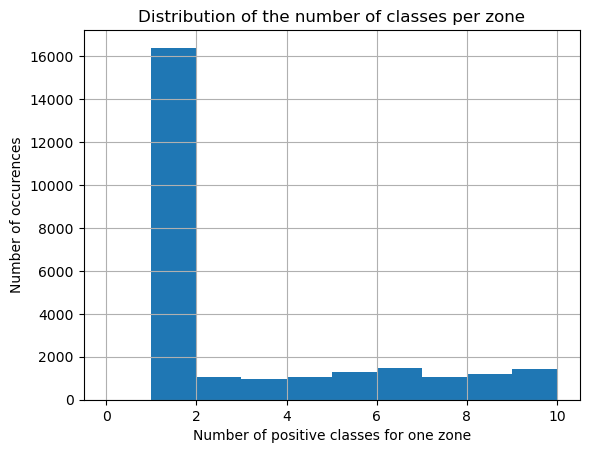

In [122]:
## Disribution of number of classes
plt.figure()
df["set_based_num_classes"].hist(bins=torch.arange(0,df["set_based_num_classes"].max()+2).tolist())
plt.title("Distribution of the number of classes per zone")
plt.xlabel("Number of positive classes for one zone")
plt.ylabel("Number of occurences")

Text(0, 0.5, 'Number of occurences')

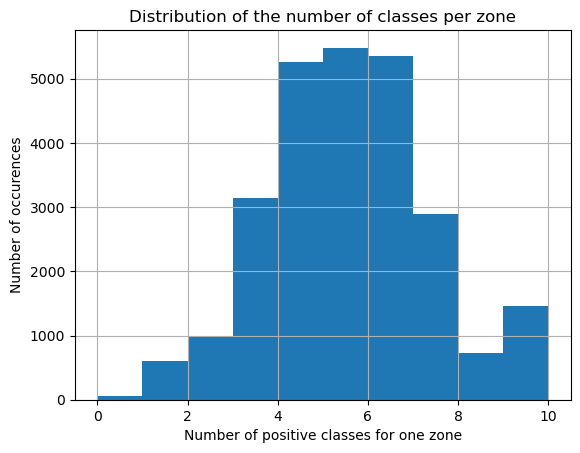

In [121]:
## Disribution of number of classes
plt.figure()
df["species_based_num_classes"].hist(bins=torch.arange(0,df["species_based_num_classes"].max()+2).tolist())
plt.title("Distribution of the number of classes per zone")
plt.xlabel("Number of positive classes for one zone")
plt.ylabel("Number of occurences")

In [42]:
c = json.loads(b)
c[1]

2

In [75]:
torch.nn.functional.one_hot(torch.tensor([1,4])-1,num_classes=9).sum(dim=0).tolist()

[1, 0, 0, 1, 0, 0, 0, 0, 0]

In [90]:
import numpy as np

In [91]:
a = np.array([0,1,2,4,2])

In [93]:
b = a.tolist()

In [96]:
isinstance(a,list)

False